In [77]:
#Import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#load data
train_df = pd.read_csv("D:\Python project\Titanic/train.csv", index_col = 'PassengerId')
test_df =pd.read_csv("D:\Python project\Titanic/test.csv", index_col = 'PassengerId')

In [79]:
#read data
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [80]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# checck data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp , Parch

Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
Numerical: (continuous) Age, Fare, (discrete)

Mix types of data: Ticket, Cabin

Contain Error/Typo: Name

Blank or Null: Cabin > Age > Embarked

Various Data Type: String, Int, Float


In [84]:
#change data type
columns = ['Survived', 'Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
for i in train_df.columns:
    if i in columns:
        train_df[i] = train_df[i].astype('category')

In [85]:
#check data type 
train_df.dtypes

Survived    category
Pclass      category
Name          object
Sex         category
Age          float64
SibSp       category
Parch       category
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

DISTRIBUTION OF NUMERICAL FEATURE ACORSS THE SAMPLES


In [87]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


DISTRIBUTION OF NUMERICAL FEATURE ACORSS THE SAMPLES

In [88]:
train_df.describe(include ='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [89]:
train_df['Survived'].unique

<bound method Series.unique of PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]>

# Exploratory data analysis (EDA)

1 Percentage of survived between male and female

In [90]:
#Check survived column 
train_df["Survived"].value_counts(normalize = True).to_frame()


,Survived
0,0.616162
1,0.383838


In [91]:
#check sex column
train_df["Sex"].value_counts(normalize = True).to_frame()

,Sex
male,0.647587
female,0.352413


<AxesSubplot:xlabel='Sex', ylabel='count'>

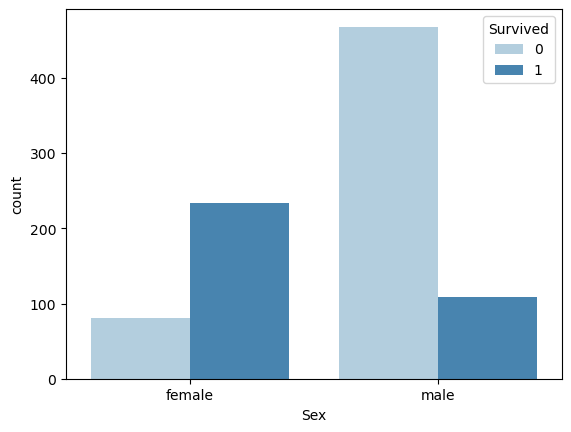

In [92]:
#survived by sex
sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', palette = 'Blues')

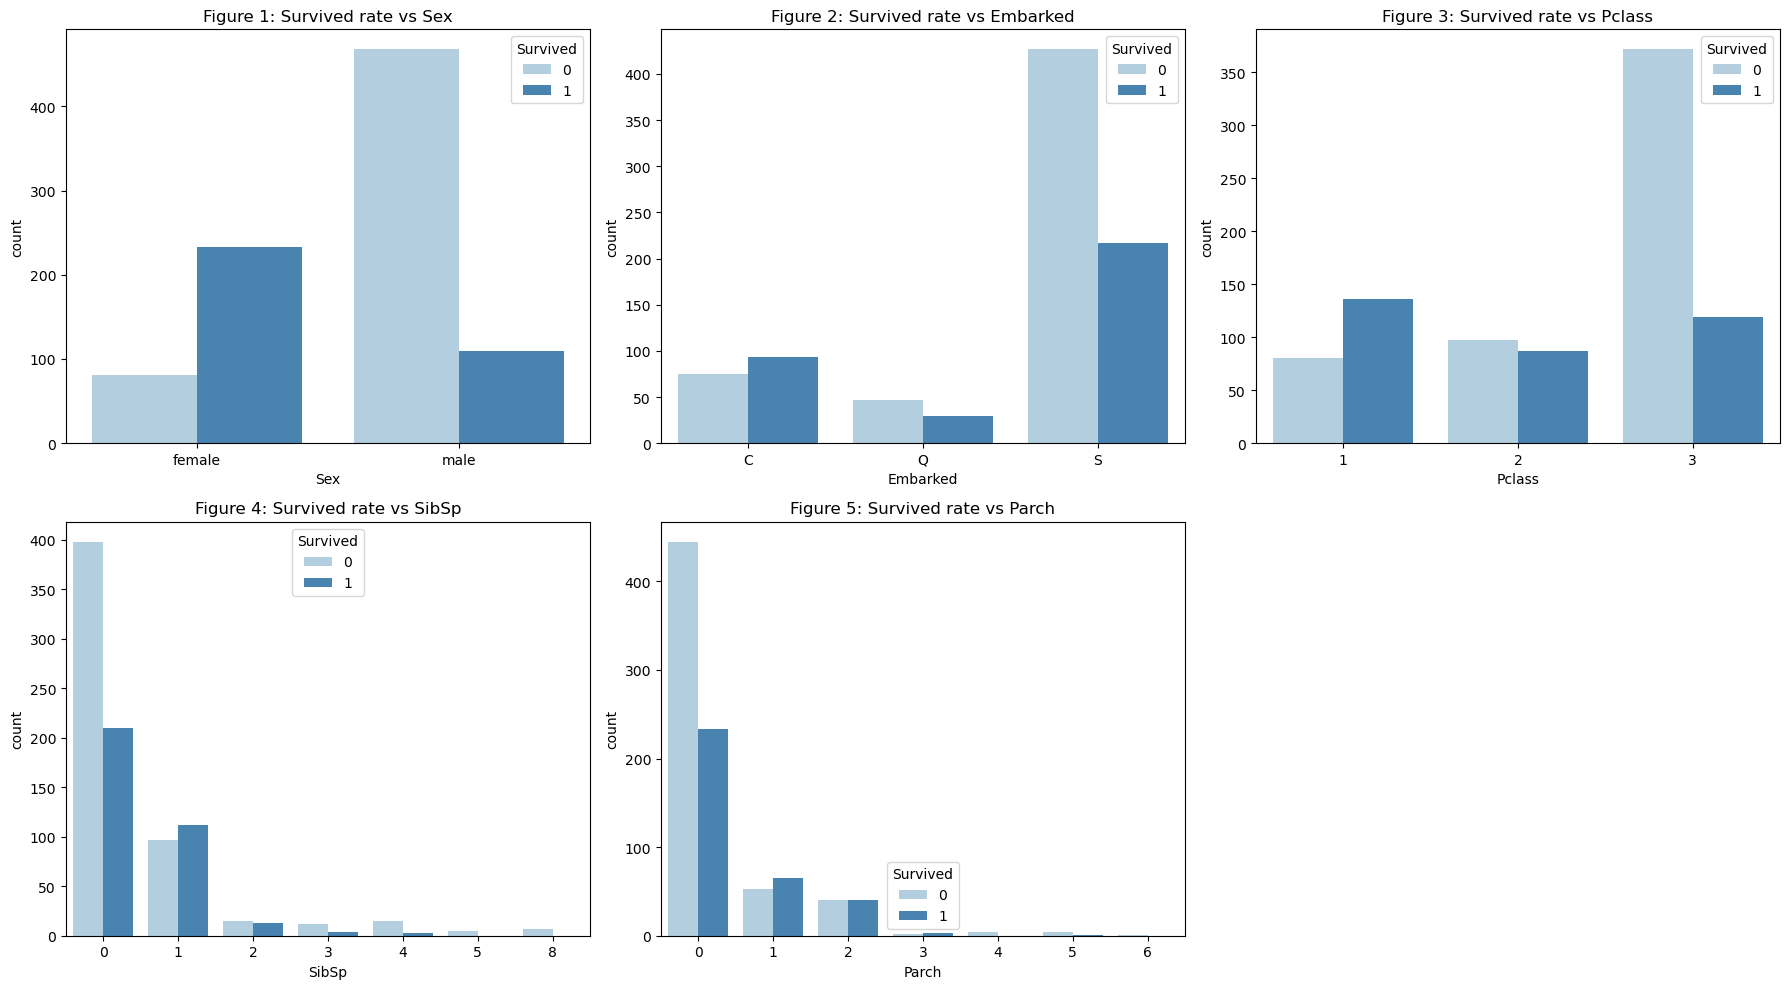

In [93]:
# survived and other factors
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize =(18,10))
for c in range(0, n_rows):
    for r in range(0, n_cols):
        i = c*n_cols + r
        if i < len(cols):
            ax_i = ax[c, r]
            sns.countplot(data = train_df, x = cols[i], hue = 'Survived', palette = 'Blues', ax = ax_i)
            ax_i.set_title(f"Figure {i+1}: Survived rate vs {cols[i]}")
ax.flat[-1].set_visible(False)
plt.tight_layout()

Comment:
F1:Female was more likely survived than male
F2: Southamton embarkation is place contain more survived people
F3: Class 1 is more likely to be lived, in contrast to class 3
F4: SibSp = 0 has the most people died

2 EDA for numerical feature

<AxesSubplot:xlabel='Age', ylabel='Count'>

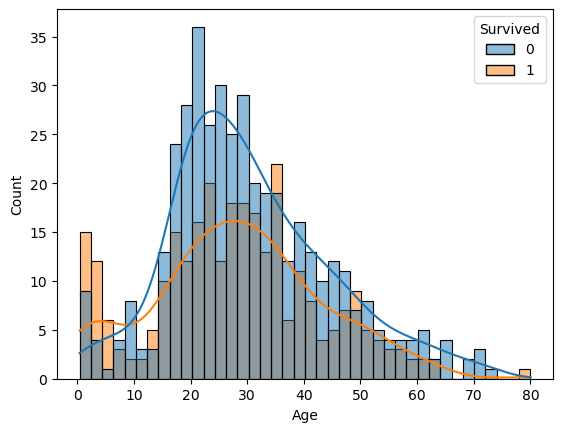

In [94]:
#Survived by age
sns.histplot(data =train_df, hue = 'Survived',x = 'Age', bins = 40, kde = True)

Comment:
- Major passenger were at 15 to 15
- Children has more chance to survive than older one

# Fare

In [95]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

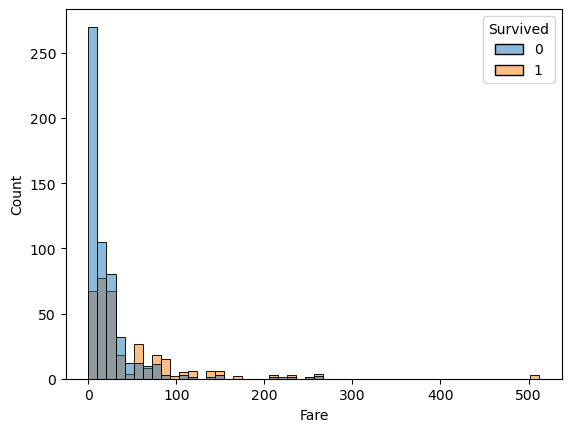

In [96]:
# survived by Fare
sns.histplot(data = train_df, x = 'Fare', hue = 'Survived', bins = 50)

<AxesSubplot:xlabel='Fare', ylabel='count'>

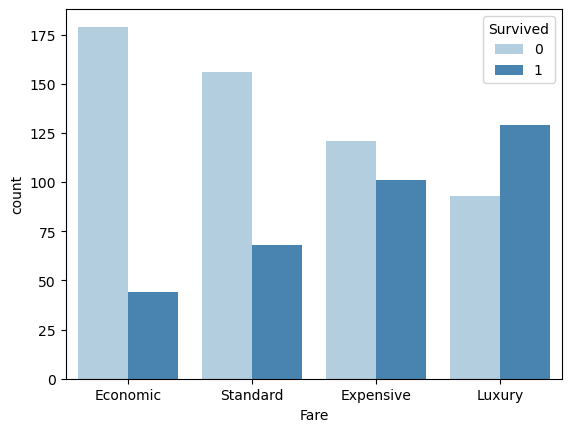

In [97]:
#Divide by Fare 
fareCategory = ['Economic', 'Standard', 'Expensive', 'Luxury']
quantile_data = pd.qcut(train_df['Fare'], 4, labels = fareCategory)
sns.countplot(x = quantile_data, hue = train_df['Survived'], palette ='Blues')


+ Distribution of Fare
Fare does not follow a normal distribution and has a huge spike at the price range [0–100$].
The distribution is skewed to the left 
+ Quartile plot:
Passenger with Luxury & Expensive Fare will have more chance to survive

# Feature Engineering & Data Wrangling

# Name

In [98]:
train_df['Name'].tail()

PassengerId
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [101]:
import re
def extract_title(name):
    p = re.compile(r",(.+)\.")
    return p.search(name).groups(1)[0].rstrip()
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
    

In [102]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
